In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [193]:
train = pd.read_csv('train.csv')

In [194]:
test = pd.read_csv('test.csv')

In [195]:
train.shape

(4250, 20)

In [196]:
test.shape

(750, 20)

In [197]:
pd.set_option('display.max_columns', None)

In [198]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [200]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [201]:
train.describe(include='O') #here the 'O' stands for object datatypes

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


### Univariate Analysis
#### Analysis of only one vaiable. This analysis will not deal with causes or relationships. It's major puspose is to describe a variable. It is used to summarize a variable. In this analysis we take data, summarise it, and then find some pattern in the data.

In [202]:
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [203]:
cat_var = [feature for feature in train.columns if train[feature].dtypes == 'O']

In [204]:
cat_var

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [205]:
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


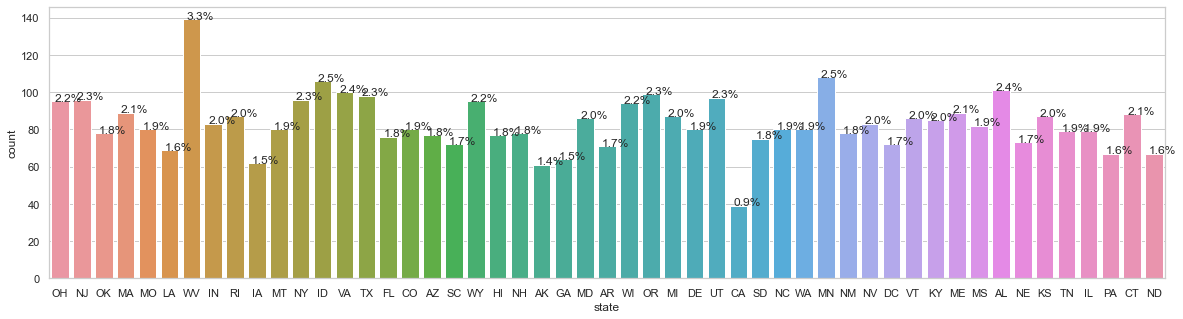

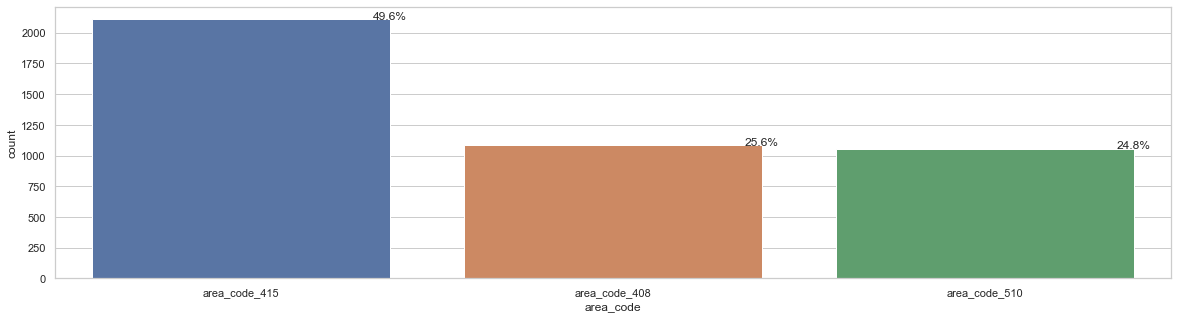

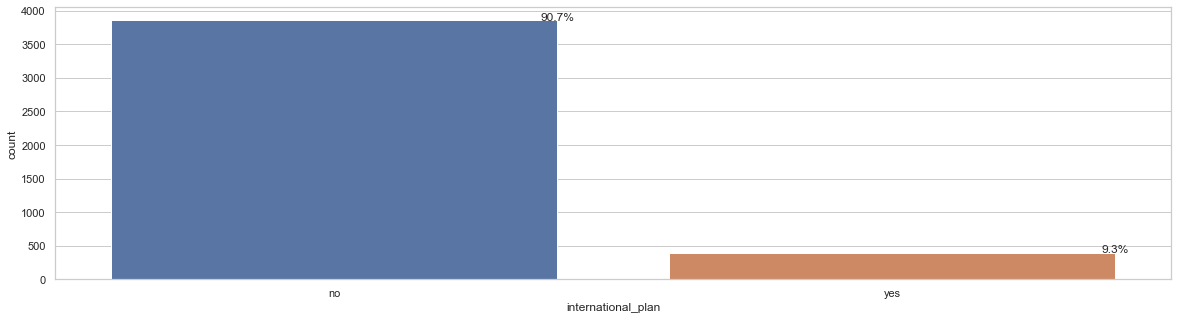

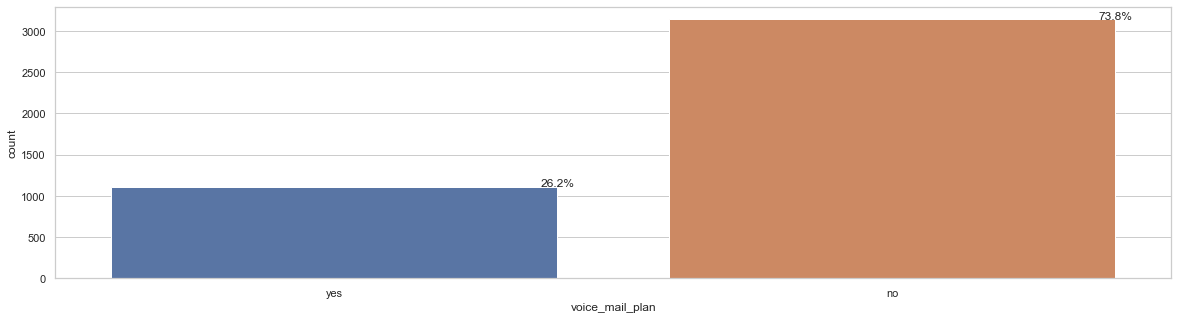

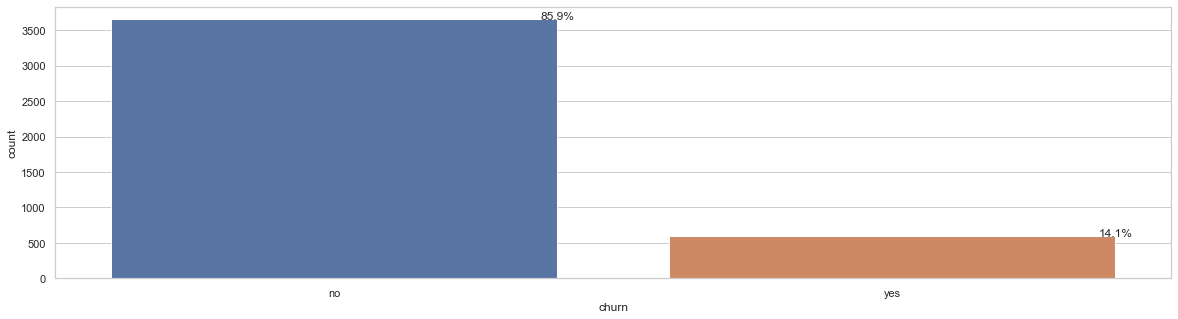

In [206]:
#display all categorical variables
for feature in cat_var:
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,5))
    total = len(train)
    ax = sns.countplot(x = train[feature], data = train)
    with_per(total, ax)
    plt.show()

### Results from above analysis:


### Numeric Variables

In [207]:
num_var = [feature for feature in train.columns if train[feature].dtype != 'O']

In [208]:
num_var

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


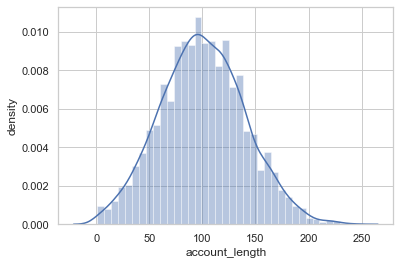

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


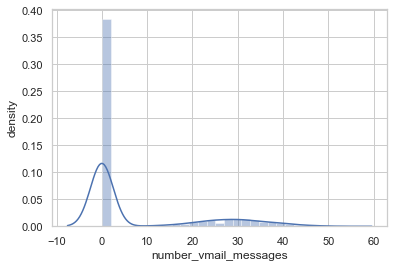

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


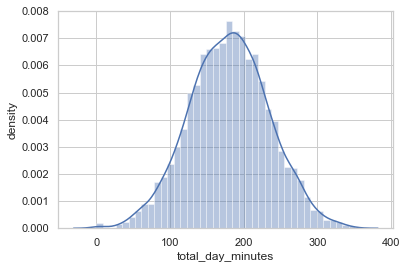

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


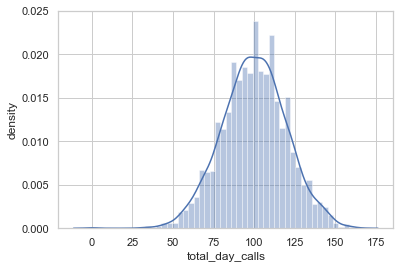

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


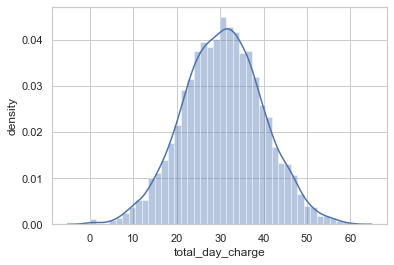

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


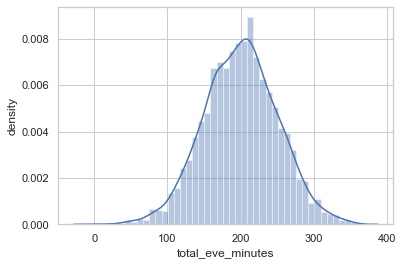

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


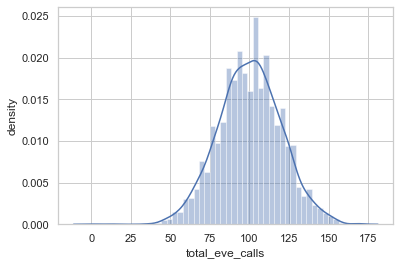

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


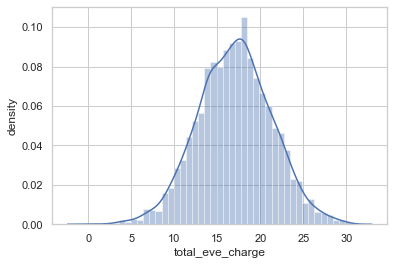

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


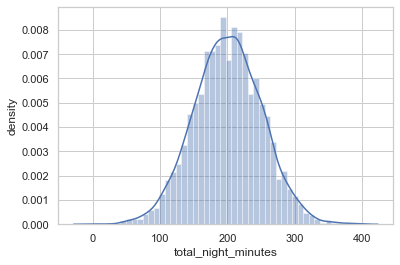

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


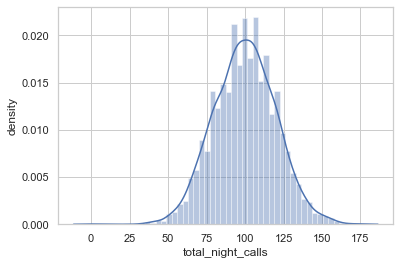

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


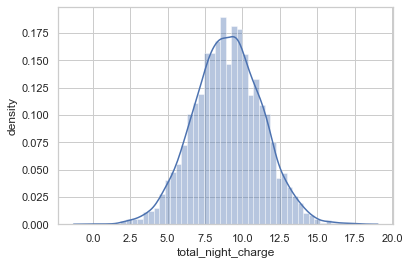

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


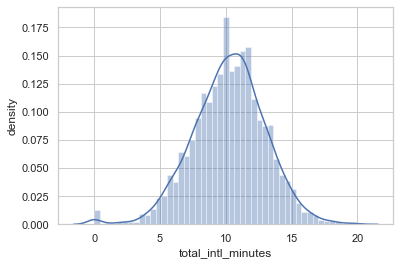

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


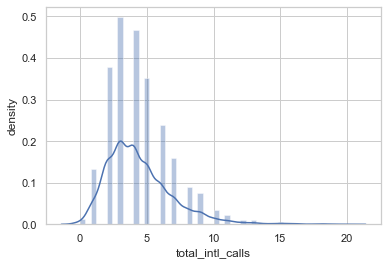

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


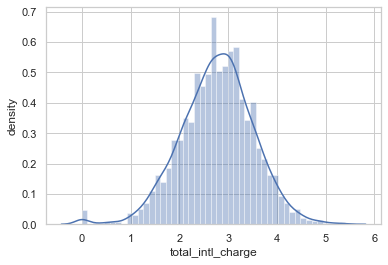

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


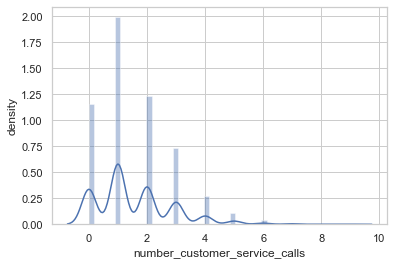

In [209]:
for feature in num_var:
    sns.distplot(train[feature])
    plt.xlabel(feature)
    plt.ylabel('density')
    plt.show()

#### * Number_customer_service_calls, total_internation_call and Number_voice_mail_messages are not a normal distribuation so, we need to convert them into a normal distribution in th feature engineering step
#### * The other numeric features have a distribution that closely resembels a normal distribution

### BiVariate Analysis
#### Bivariate analysis means the analysis of bivariate data. It is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

* Univariate analysis is the analysis of one (“uni”) variable.
* Bivariate analysis is the analysis of exactly two variables.
* Multivariate analysis is the analysis of more than two variables.

<AxesSubplot:>

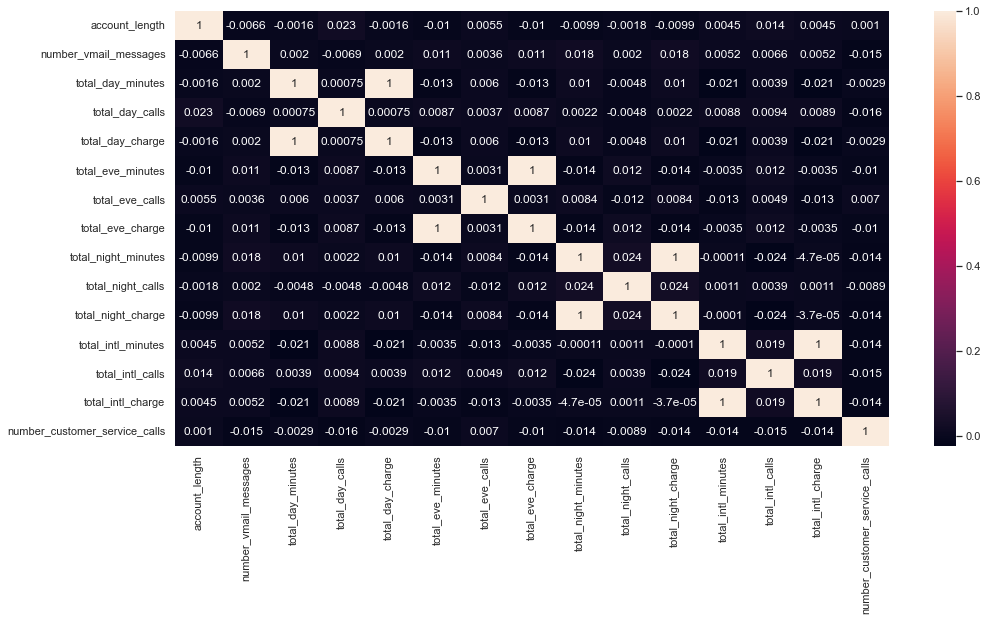

In [210]:
plt.figure(figsize=(16,8))
sns.heatmap(train[num_var].corr(), annot=True)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Churn rate VS account_length')

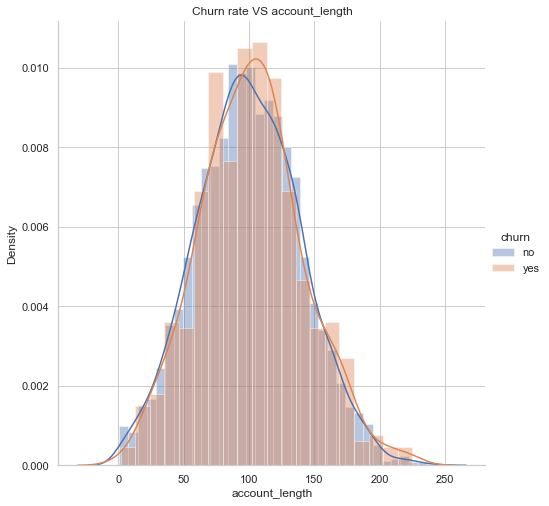

In [211]:
sns.FacetGrid(train, hue='churn',size=7).map(sns.distplot, 'account_length').add_legend()
plt.title('Churn rate VS account_length')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '')

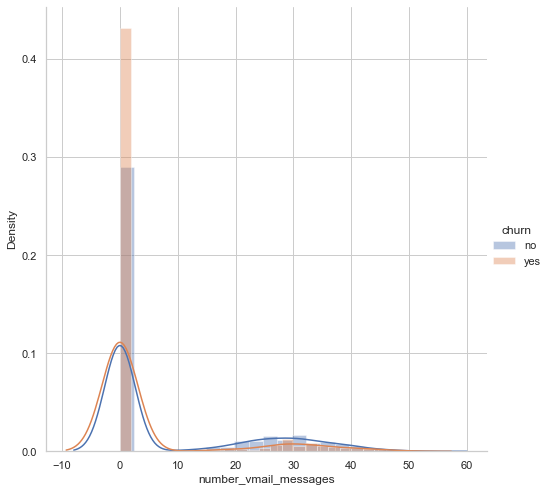

In [212]:
sns.FacetGrid(train, hue='churn', size=7).map(sns.distplot, 'number_vmail_messages').add_legend()
plt.title('')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


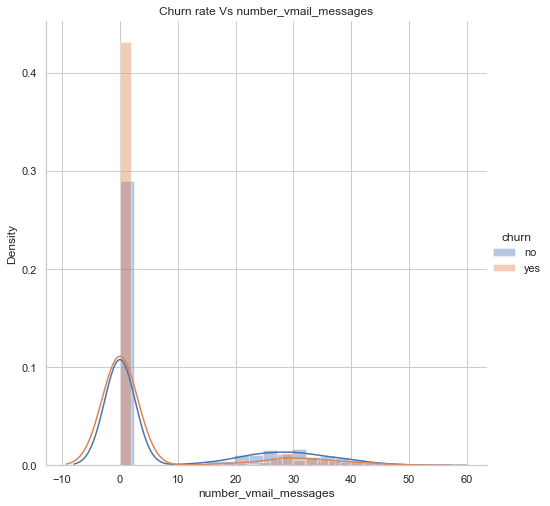

In [213]:
sns.FacetGrid(train, hue='churn', size=7).map(sns.distplot, 'number_vmail_messages').add_legend()
plt.title('Churn rate Vs number_vmail_messages')
plt.show()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


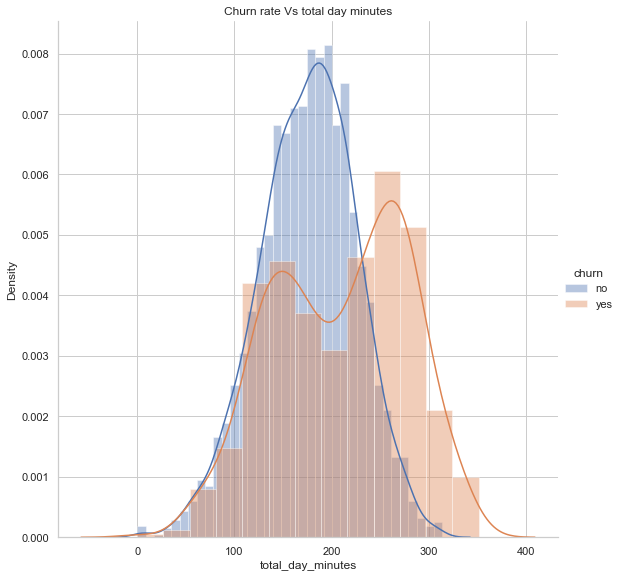

In [214]:
sns.FacetGrid(train, hue='churn', size = 8).map(sns.distplot, 'total_day_minutes').add_legend()
plt.title('Churn rate Vs total day minutes')
plt.show()

In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


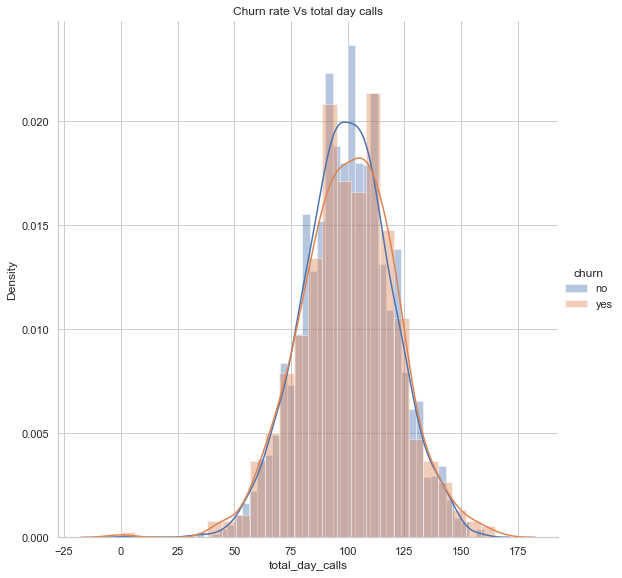

In [216]:
sns.FacetGrid(train, hue='churn', size=8).map(sns.distplot, 'total_day_calls').add_legend()
plt.title('Churn rate Vs total day calls')
plt.show()

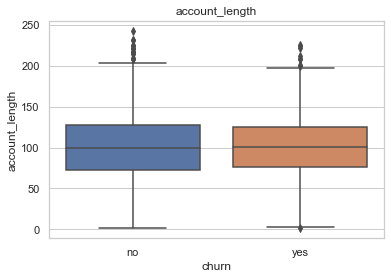

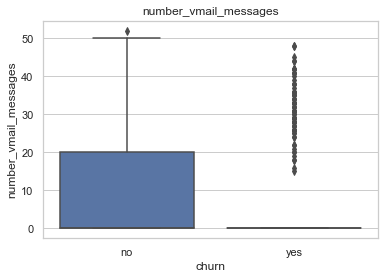

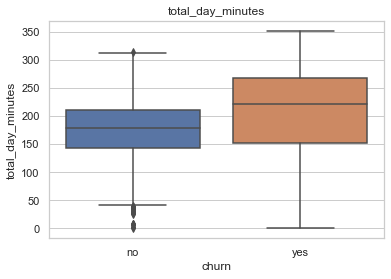

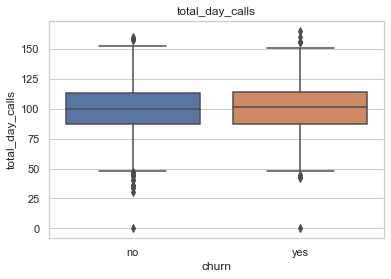

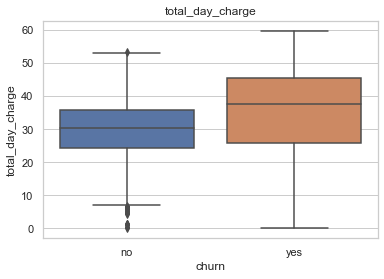

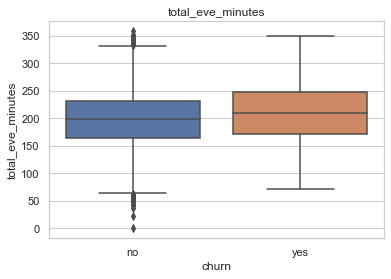

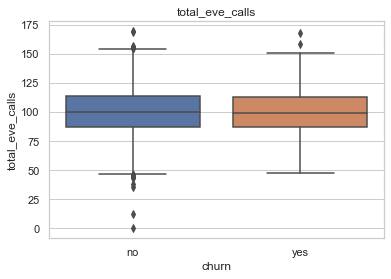

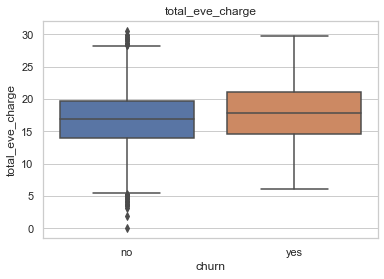

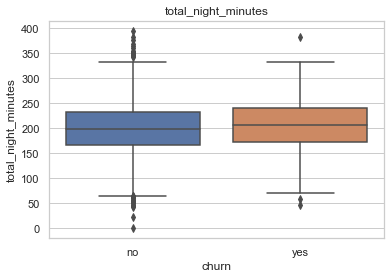

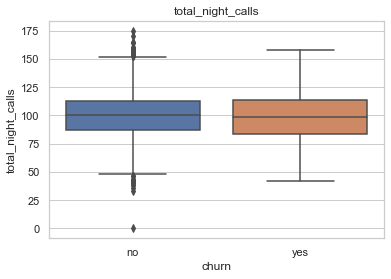

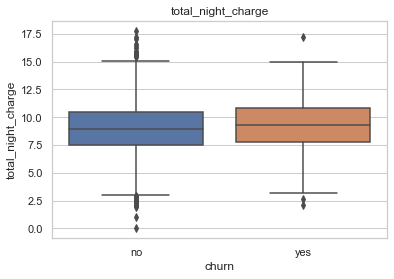

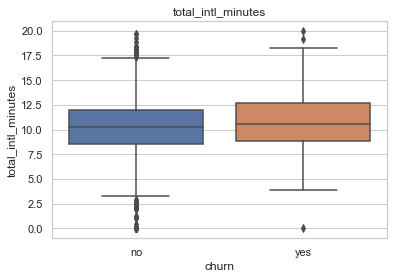

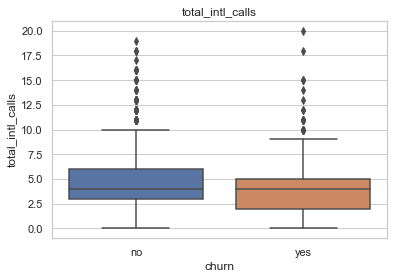

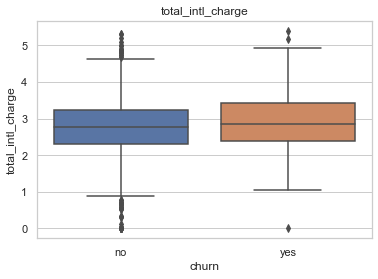

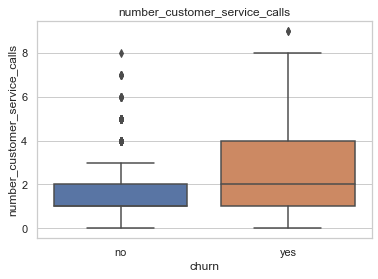

In [217]:
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

In [218]:
def remove_outliers(train, labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3-q1
        upper_bound = q3+1.5*iqr
        lower_bound = q1-1.5*iqr
        train[label] = train[label].mask(train[label]<lower_bound, train[label].median(), axis=0)
        train[label] = train[label].mask(train[label]>upper_bound, train[label].median(), axis=0)
        
    return train

In [219]:
train = remove_outliers(train, num_var)

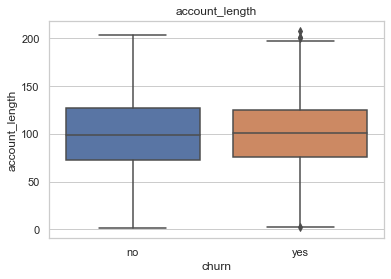

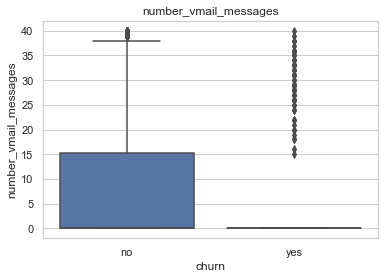

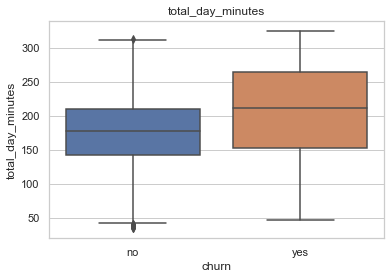

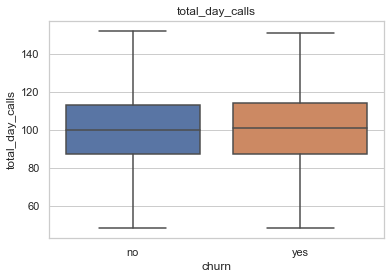

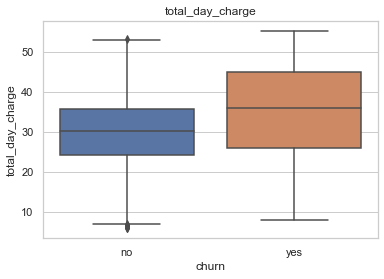

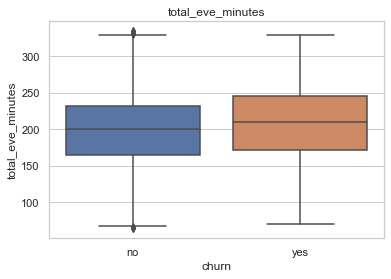

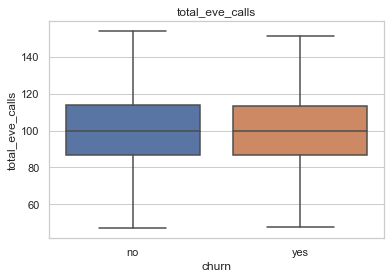

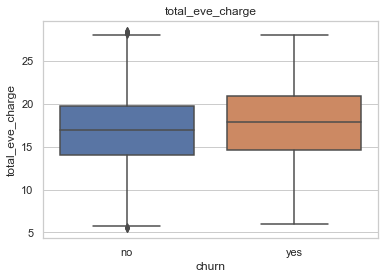

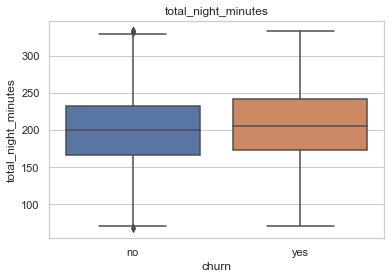

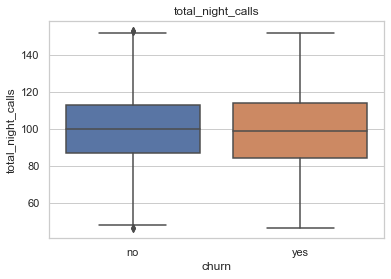

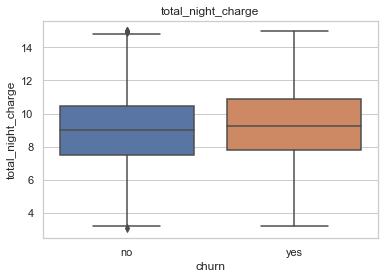

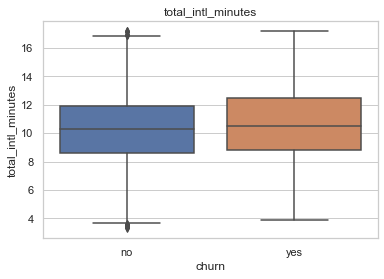

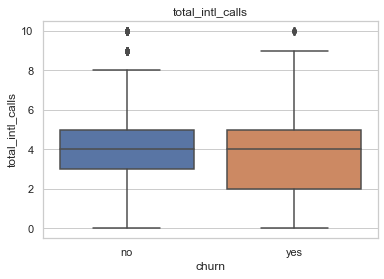

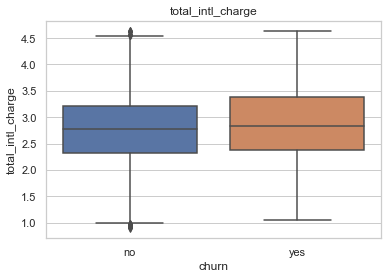

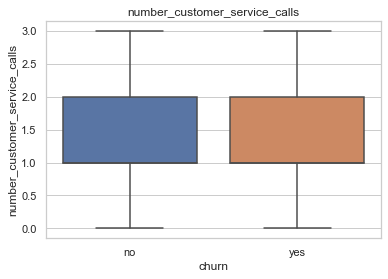

In [84]:
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

#### Using Hash Encoding to limit no of features in State column

In [85]:
hash_state = ce.HashingEncoder(cols='state')
train = hash_state.fit_transform(train)
test = hash_state.transform(test)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,0,1,0,0,0,0,0,0,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,0,0,0,0,1,0,0,0,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,0,0,0,0,1,0,0,0,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,0,0,0,0,1,0,0,0,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


In [86]:
test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,id,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,0,0,0,0,0,0,1,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,0,0,0,0,0,0,2,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0,0,0,0,0,0,0,1,3,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0,0,0,0,1,0,0,0,4,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,1,0,0,0,0,0,0,0,5,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [92]:
train = pd.get_dummies(train, drop_first=True, columns=['international_plan'])

In [93]:
test = pd.get_dummies(test, drop_first=True, columns=['international_plan'])

In [94]:
train = pd.get_dummies(train, drop_first=True, columns=['voice_mail_plan', 'churn'])

In [96]:
test = pd.get_dummies(test, drop_first=True, columns=['voice_mail_plan'])

In [99]:
train.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes,churn_yes,area_code_area_code_415,area_code_area_code_510
0,0,0,0,0,1,0,0,0,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,84.0,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,121.0,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0,1,0,0,1
5,0,1,0,0,0,0,0,0,147.0,0.0,157.0,79.0,26.69,103.1,94.0,8.76,211.8,96.0,9.53,7.1,6.0,1.92,0.0,1,0,0,1,0
6,0,1,0,0,0,0,0,0,117.0,0.0,184.5,97.0,31.37,200.7,80.0,17.06,215.8,90.0,9.71,8.7,4.0,2.35,1.0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,141.0,37.0,258.6,84.0,43.96,222.0,111.0,18.87,326.4,97.0,14.69,11.2,5.0,3.02,0.0,1,1,0,1,0
8,0,0,0,1,0,0,0,0,65.0,0.0,129.1,137.0,21.95,228.5,83.0,19.42,208.8,111.0,9.40,12.7,6.0,3.43,1.0,0,0,1,1,0
9,0,0,1,0,0,0,0,0,74.0,0.0,187.7,127.0,31.91,163.4,148.0,13.89,196.0,94.0,8.82,9.1,5.0,2.46,0.0,0,0,0,1,0


In [98]:
train = pd.get_dummies(train, drop_first=True, columns=['area_code'])

In [105]:
train = train.rename(columns={'churn_yes': 'churn'})

In [100]:
test = pd.get_dummies(test, drop_first=True, columns=['area_code'])

In [101]:
test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes,area_code_area_code_415,area_code_area_code_510
0,0,1,0,0,0,0,0,0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,1,0
1,0,1,0,0,0,0,0,0,2,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1,0,0,1
2,0,0,0,0,0,0,0,1,3,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,0,1,0
3,0,0,0,0,1,0,0,0,4,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0,0,1
4,1,0,0,0,0,0,0,0,5,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0,0,1,0


#### Handling imbalanced dataset

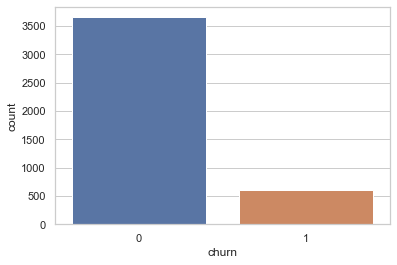

In [106]:
sns.countplot(x = 'churn', data = train)
plt.show()
#Below, '0' represents no churn, '1' represents churn

In [107]:
x = train.drop('churn', axis=1)
y = train.churn

In [108]:
x.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes,area_code_area_code_415,area_code_area_code_510
0,0,0,0,0,1,0,0,0,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,1,1,0
1,0,1,0,0,0,0,0,0,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0,0,1,0
2,0,0,0,0,1,0,0,0,84.0,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,1,0,0,0
3,0,0,0,0,1,0,0,0,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,1,0,1,0
4,0,0,0,0,1,0,0,0,121.0,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0,1,0,1


In [109]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: uint8

In [110]:
id_submission = test.id

In [111]:
test = test.drop('id', axis=1)

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state = 14)
#stratified splitting improved accuracy by 1% bringing it closer to what SMOTE would have achieved without startified sampling

### Random Forest

In [181]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [182]:
rfc_predict = rfc.predict(x_test)

In [183]:
rfc_accuracy = accuracy_score(y_test, rfc_predict)

In [184]:
rfc_accuracy

0.922859830667921

In [185]:
print('{}'.format(classification_report(y_test, rfc_predict)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       913
           1       0.94      0.49      0.64       150

    accuracy                           0.92      1063
   macro avg       0.93      0.74      0.80      1063
weighted avg       0.92      0.92      0.91      1063



In [186]:
rfc_confusion_matrix = confusion_matrix(y_test, rfc_predict)

rfc_confusion_matrix

array([[908,   5],
       [ 77,  73]], dtype=int64)

In [187]:
rfc_cohen = cohen_kappa_score(y_test, rfc_predict)
rfc_cohen

0.6019162967428436

#### XG Boost

In [188]:
xgb = XGBClassifier(max_depth = 6, n_estimators = 300, learning_rate=0.01)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [189]:
xgb_predict = xgb.predict(x_test)

In [190]:
xgb_accuracy = accuracy_score(y_test, xgb_predict)
xgb_accuracy

0.9275634995296331

In [191]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predict)

xgb_confusion_matrix

array([[909,   4],
       [ 73,  77]], dtype=int64)

### Doing everything over without 'state' information

In [220]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,NJ,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,OH,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,OK,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,MA,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


In [221]:
train = train.drop(columns = ['state'])
test = test.drop(columns= ['state'])

In [222]:
train.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107.0,area_code_415,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,137.0,area_code_415,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,84.0,area_code_408,yes,no,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,75.0,area_code_415,yes,no,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,121.0,area_code_510,no,yes,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no


In [223]:
train = pd.get_dummies(train, drop_first=True, columns=['international_plan'])

In [224]:
test = pd.get_dummies(test, drop_first=True, columns=['international_plan'])

In [225]:
train = pd.get_dummies(train, drop_first=True, columns=['voice_mail_plan', 'churn'])

In [226]:
test = pd.get_dummies(test, drop_first=True, columns=['voice_mail_plan'])

In [ ]:
train = pd.get_dummies(train, drop_first=True, columns=['international_plan'])

In [234]:
train = pd.get_dummies(train, drop_first=True, columns=['area_code'])

In [235]:
test = pd.get_dummies(test, drop_first=True, columns=['area_code'])

In [236]:
train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes,churn_yes,area_code_area_code_415,area_code_area_code_510
0,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0,1,0,1,0
1,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0,0,0,1,0
2,84.0,0.0,299.4,71.0,50.90,200.7,88.0,17.06,196.9,89.0,8.86,6.6,7.0,1.78,2.0,1,0,0,0,0
3,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,1,0,0,1,0
4,121.0,24.0,218.2,88.0,37.09,200.7,108.0,17.06,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0,1,0,0,1


In [237]:
x = train.drop('churn_yes', axis=1)
y = train.churn_yes

In [238]:
id_submission = test.id

AttributeError: 'DataFrame' object has no attribute 'id'

In [231]:
test = test.drop('id', axis=1)

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state = 14)
#stratified splitting improved accuracy by 1% bringing it closer to what SMOTE would have achieved without startified sampling

In [240]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [241]:
rfc_accuracy = accuracy_score(y_test, rfc_predict)
rfc_accuracy

0.922859830667921

In [242]:
xgb = XGBClassifier(max_depth = 6, n_estimators = 300, learning_rate=0.01)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [243]:
xgb_predict = xgb.predict(x_test)

In [244]:
xgb_accuracy = accuracy_score(y_test, xgb_predict)
xgb_accuracy

0.9275634995296331